# Laboratorio 6: Árboles de Decisión y Bagging

Integrantes: **José Canales y Sebastián Salas**, ambos sección 1

## Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from tp_arbres_source import rand_checkers, plot_2d, frontiere

## Árboles de Decisión

### Definición de problema y notaciones

Estamos trabajando en el problema de clasificación multiclase con $K$ clases. Para recordar las notaciones, puedes consultar el laboratorio sobre $k$-vecinos más cercanos (k-NN). Suponemos que se ha observado un conjunto de entrenamiento de tamaño $n$: $\mathcal{D}_n = {(\mathbf{x}_i , y_i),; i = 1, \dots, n}$ que contiene $n$ observaciones y sus etiquetas. Como recordatorio: $\mathbf{x}_i = (x_1,\dots,x_p)^\top \in \mathcal{X} \subset \mathbb{R}^p$ es una observación. En el caso bidimensional, $p = 2$.

### Generación de datos artificiales
Puedes reutilizar las funciones de generación de datos del laboratorio anterior (k-NN). Para visualizar algunos conjuntos de datos, puedes usar y modificar las funciones plot_2d o plot_2d_simple del archivo tp_arbres_source.py.

### Algoritmo de CART

Recordemos cómo funciona un árbol de decisión. Nota que solo consideramos árboles binarios aquí: un nodo puede tener dos hijos o ninguno si es una hoja.

Toda partición de datos puede representarse como un árbol. Inicialmente, el árbol se limita a un solo nodo, la raíz, que representa todo el espacio $\mathcal{X}$. Recursivamente, en cada paso se elige:

una variable $x_k$ (entre las $p$ posibles),

un umbral $\tau \in \mathbb{R}$

y se divide el espacio de entrada $\mathcal{X}$ en dos subconjuntos representados por dos nodos en el árbol:

$I(j,\tau) = {x = (x_1,\dots,x_p)^\top \in \mathbb{R}^p : x_j < \tau }$

$D(j,\tau) = {x = (x_1,\dots,x_p)^\top \in \mathbb{R}^p : x_j \geq \tau }$

En cada paso, el número de componentes en la partición—y, de forma equivalente, el número de hojas del árbol—aumenta.
Este proceso se repite hasta que se cumple un criterio de parada, que puede ser:

- La profundidad del árbol supera un umbral dado,

- El número de observaciones en un nodo cae por debajo de un umbral,

- El número de hojas supera un límite especificado.

En la siguiente imagen se muestra un ejemplo:
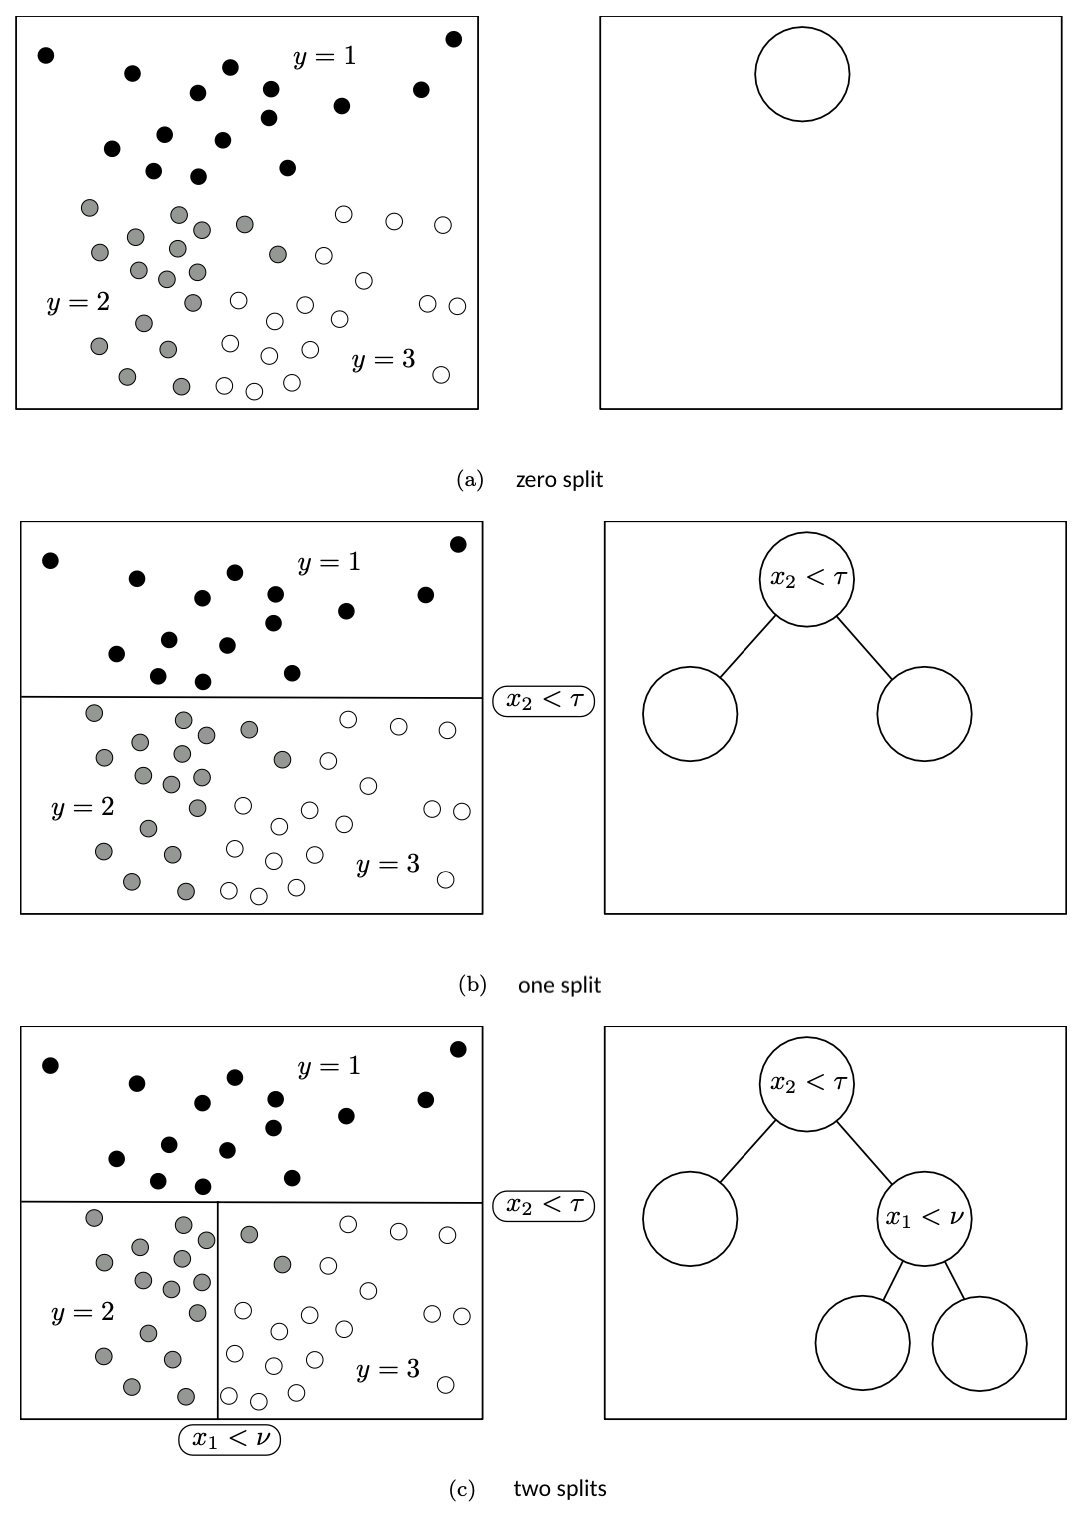

Ahora necesitamos definir una regla para decidir dónde dividir. Esta elección es crucial y no es única. Usamos una función para medir la "impureza", denotada por $H$, asociada a una partición. Buscamos la división (variable/umbral) que produzca la partición más pura según $H$. Matemáticamente, resolvemos:

$$
\arg\min_{j \in [ 1,p ],\; \tau \in \mathbb{R}} \widehat{q}_{j,\tau} H(G(j,\tau)) + (1 - \widehat{q}_{j,\tau}) H(D(j,\tau))
$$

donde:

$$
\widehat{q}_{j,\tau} =
\frac{|\{i \in [ 1,n ] : x_i \in I(j,\tau)\}|}
{|\{i' \in [ 1,n ] : x_{i'} \in I(j,\tau) \cup D(j,\tau)\}|}
$$

es la proporción de observaciones que caen en $I(j,\tau)$. Aquí, $|\cdot|$ denota la cardinalidad del conjunto.

Para cualquier conjunto $R \subset \mathbb{R}^p$ y etiqueta $k$, sea $\widehat{p}_k(R)$ la proporción de observaciones con etiqueta $k$ (indexadas de 1 a $K$):

$$
\widehat{p}_k(R) =
\frac{|\{i \in [ 1,n ] : x_i \in R \land y_i = k\}|}
{|\{i \in [ 1,n ] : x_i \in R\}|}
$$

CART considera las siguientes medidas de impureza $H$:

- Gini index: $\sum_{k=1}^K \widehat{p}_k(R)(1 - \widehat{p}_k(R))$
- Entropy: $-\sum_{k=1}^K \widehat{p}_k(R)\log(\widehat{p}_k(R))$

### Preguntas

1. Usa `rand_checkers` para simular una muestra de tamaño $n=456$ con 4 clases (asegúrate de que las clases estén bien balanceadas). Crea una curva que muestre el porcentaje de accuracy de la clasificación en función de la profundidad máxima del árbol (rango 1 a 10). Utiliza entropia como criterio del split y no olvides usar un random_state.

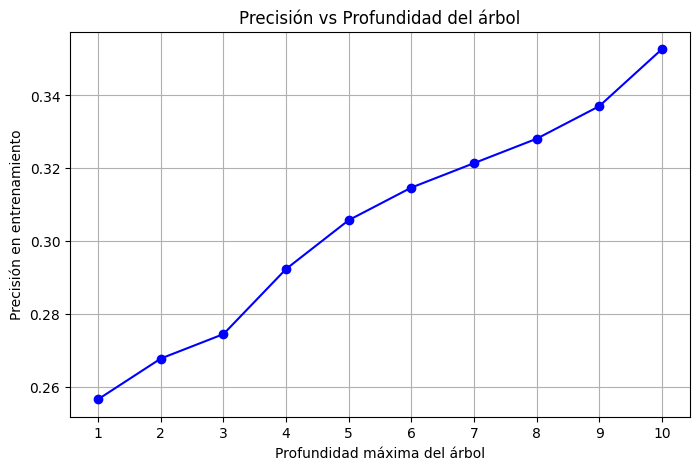

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# TODO: Generar los datos. En este paso usar todos para entrenamiento
sigma = 0.1
n = int(456/4)
data = rand_checkers(n1=n, n2=n, n3=n, n4=n, sigma=sigma)
X = data[:, :2]
Y = data[:, 2]

# TODO: Entrenar el árbol de decisión variando max_depth y guardar la precisión

max_depths = list(range(1, 11))
accuracies = []

for depth in max_depths:
    Arbol = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    Arbol.fit(X, Y)
    Y_pred = Arbol.predict(X)
    acc = accuracy_score(Y, Y_pred)
    accuracies.append(acc)

# TODO: Graficar los resultados

plt.figure(figsize=(8, 5))
plt.plot(max_depths, accuracies, marker='o', linestyle='-', color='b')
plt.title("Precisión vs Profundidad del árbol")
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Precisión en entrenamiento")
plt.xticks(max_depths)
plt.grid(True)
plt.show()

2. Muestra la clasificación resultante usando la profundidad que minimiza el porcentaje de error con entropía (usa las funciones plot_2d y frontiere del archivo fuente).

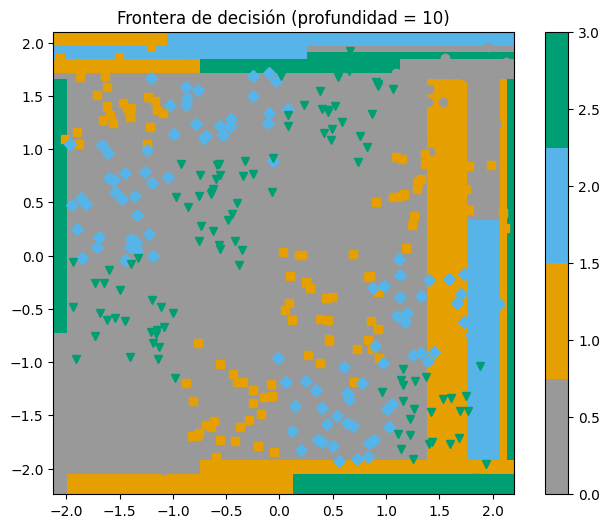

In [156]:
# Elegir la mejor profundidad
best_depth = 10

# Entrenar el mejor modelo
best_tree = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth, random_state=0)
best_tree.fit(X, Y)

# Función que devuelve las predicciones del clasificador
def f(x):
    return best_tree.predict(x)

# Mostrar frontera de decisión + puntos
plt.figure(figsize=(8, 6))
frontiere(f, X, step=100)
plot_2d(X, y=Y.astype(int))
plt.title(f"Frontera de decisión (profundidad = {best_depth})")
plt.show()

3. Vuelve a entrenar un árbol de decisión, pero con una profundidad máxima de 5. Luego genera un gráfico del árbol de decisión de la pregunta anterior. Hint: usar la función `plot_tree` del módulo `tree` de sklearn.

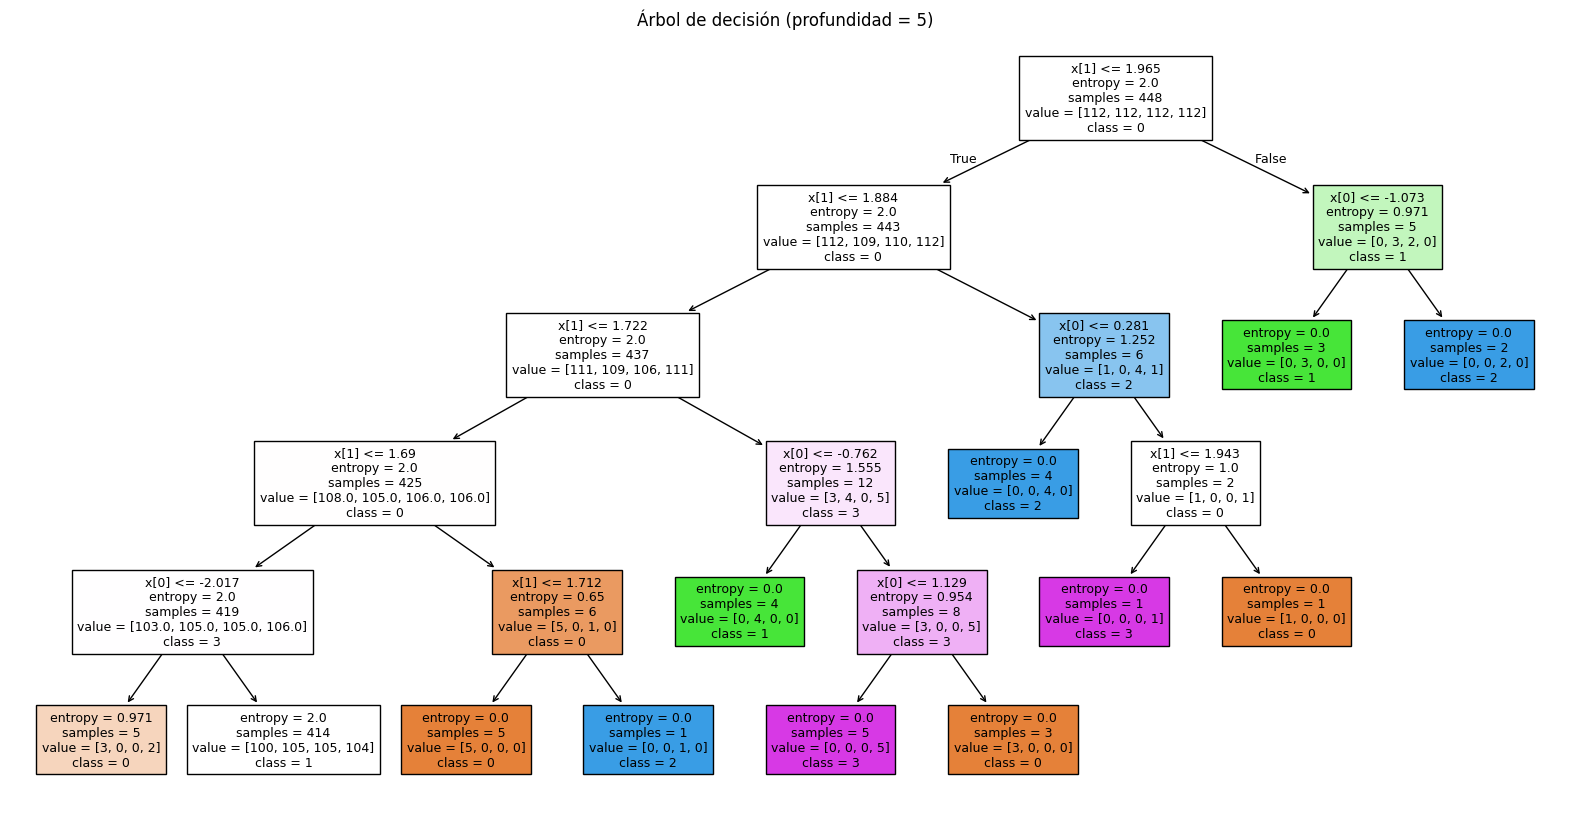

In [157]:
from sklearn.tree import plot_tree

# TODO: Entrenar árbol de decisión

tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
tree.fit(X, Y)

# TODO: Generar el gráfico
plt.figure(figsize=(20,10))
plot_tree(tree, class_names=["0", "1", "2", "3"], filled=True, fontsize=9)
plt.title("Árbol de decisión (profundidad = 5)")
plt.show()

4. Genera $n=160$ nuevos puntos de datos con rand_checkers. Para los árboles de decisión obtenidos en la pregunta 1, calcula el accuracy en esta segunda muestra. Comenta diferencias en la accuracy.

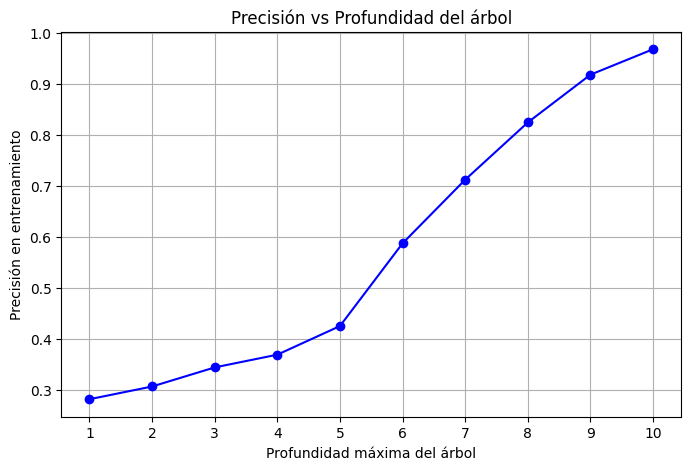

In [158]:
# TODO: Generar los datos. En este paso usar todos para entrenamiento
sigma = 0.1
n = int(160/4)
data = rand_checkers(n1=n, n2=n, n3=n, n4=n, sigma=sigma)
X = data[:, :2]
Y = data[:, 2]

# TODO: Entrenar el árbol de decisión variando max_depth y guardar la precisión

max_depths = list(range(1, 11))
accuracies = []

for depth in max_depths:
    Arbol = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    Arbol.fit(X, Y)
    Y_pred = Arbol.predict(X)
    acc = accuracy_score(Y, Y_pred)
    accuracies.append(acc)

# TODO: Graficar los resultados

plt.figure(figsize=(8, 5))
plt.plot(max_depths, accuracies, marker='o', linestyle='-', color='b')
plt.title("Precisión vs Profundidad del árbol")
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Precisión en entrenamiento")
plt.xticks(max_depths)
plt.grid(True)
plt.show()

>**Respuesta:** Se puede notar que la precisión aumenta levemente más rápido conforme se aumenta la profundidad en comparación del primer gráfico, para luego estancarse en un valor muy cercano a 1 en la precisión.

5. Repite el experimento de la pregunta 4 para el conjunto de datos zipcode. Este conjunto está disponible en sklearn.datasets. Puedes cargarlo usando la función load_digits (o ver más en [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)):

```python
digits = datasets.load_digits()
 ```

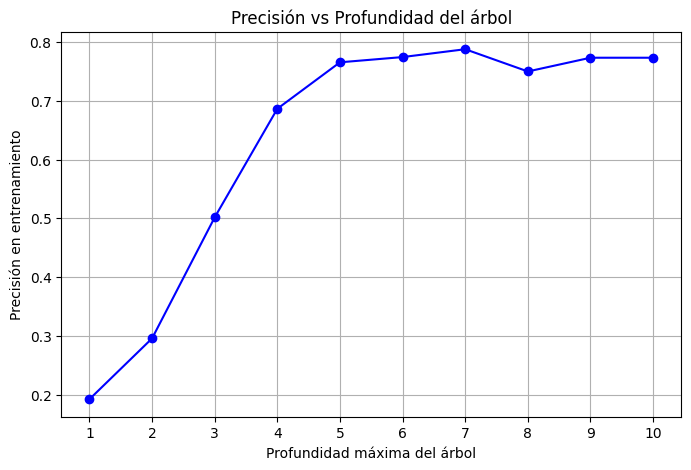

In [159]:
from sklearn import datasets
digits = datasets.load_digits()

n_samples = len(digits.data)
X = digits.data[:n_samples // 2]
Y = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]

# TODO: Obtener precision para cada max_depth
max_depths = list(range(1, 11))
accuracies = []

for depth in max_depths:
    Arbol = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    Arbol.fit(X, Y)
    Y_pred = Arbol.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracies.append(acc)


# TODO: Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(max_depths, accuracies, marker='o', linestyle='-', color='b')
plt.title("Precisión vs Profundidad del árbol")
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Precisión en entrenamiento")
plt.xticks(max_depths)
plt.grid(True)
plt.show()

#### Métodos de selección de parámetros - Selección de modelos

En la práctica, rara vez se dispone de un conjunto de prueba (preferimos incluir la mayor cantidad de datos en el conjunto de entrenamiento, pero en la parte anterior usamos solo la mitad). Para seleccionar un modelo o parámetro utilizando la mayor cantidad posible de ejemplos de entrenamiento, normalmente se usa la validación cruzada. Para cada parámetro, se obtiene una estimación del error empírico de la siguiente manera:

Dividir el conjunto de entrenamiento en $N$ subconjuntos de tamaño $n/N$

Para cada subconjunto, medir el error del clasificador (con el conjunto de parámetros fijado) entrenado con los otros $N-1$ subconjuntos

El error estimado es el promedio de los errores de todos los clasificadores entrenados

Esto se puede repetir sobre una malla de parámetros para obtener una estimación de error por parámetro, y luego elegir el parámetro que minimiza dicha estimación.

Para más detalles sobre las funcionalidades de validación cruzada en scikit-learn, consulta http://scikit-learn.org/stable/modules/cross_validation.html.

6. Usa la función `sklearn.model_selection.cross_val_score` con 5 folds, y pruébala en el conjunto de datos zipcode variando la profundidad del árbol. Con esta función, determina la mejor profundidad máxima (puedes aumentar el rango) y la precisión promedio obtenida con ella.

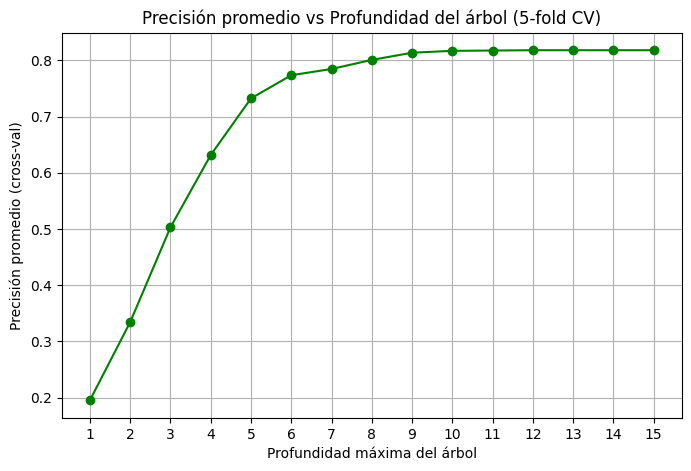

Mejor profundidad: 12
Precisión promedio con esa profundidad: 0.8180516867842773


In [160]:
from sklearn.model_selection import cross_val_score

dmax = 15 # Rango máximo a probar para profundidad
X = digits.data
y = digits.target

max_depths = list(range(1, dmax + 1))
accuracies = []

# TODO: guardar la precisión promedio para cada profundidad

for depth in max_depths:
    Arbol = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    scores = cross_val_score(Arbol, X, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    accuracies.append(mean_accuracy)

# TODO: graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(max_depths, accuracies, marker='o', linestyle='-', color='green')
plt.title("Precisión promedio vs Profundidad del árbol (5-fold CV)")
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Precisión promedio (cross-val)")
plt.xticks(max_depths)
plt.grid(True)
plt.show()
# TODO: imprimir la profundidad óptima y la precisión obtenida con ella

best_depth = max_depths[np.argmax(accuracies)]
best_score = max(accuracies)
print(f"Mejor profundidad: {best_depth}")
print(f"Precisión promedio con esa profundidad: {best_score}")

## Bagging de Árboles de decisión: Random Forests

Bagging (abreviación de "Bootstrap Aggregation"; Breiman et al. 96) es un método clásico para ponderar modelos. Consiste simplemente en promediar las predicciones con $w_l = 1/L$. Para generar datos de entrenamiento aleatorios, utiliza muestreo bootstrap. Una muestra bootstrap es una muestra de $n$ puntos de entrenamiento extraídos de $\mathcal{D}$ mediante muestreo aleatorio con reemplazo.

### Funcionamiento

Consideremos el problema estándar de aprendizaje supervisado. Dado un conjunto de entrenamiento $\mathcal{D} = {(X_1, Y_1), \dots, (X_n, Y_n)}$ generado por una función desconocida $f$, donde $Y = f(X)$, un algoritmo de aprendizaje estima $\hat{f}_\mathcal{D}$, que es el modelo estimado. Si los valores $Y_i$ están en ${1, \dots, K}$, tenemos un problema de clasificación con $K$ clases; si los valores $Y_i$ están en $\mathbb{R}$, es un problema de regresión.

Una agregación de modelos (clasificadores/estimadores) se obtiene mediante una combinación (lineal) de las predicciones individuales de cada modelo. En regresión, el modelo agregado $\hat{F}\mathcal{D}^L$ se obtiene a partir de $L$ clasificadores/estimadores $\hat{f}\mathcal{D}^l,; l = 1,\dots,L$ de la siguiente forma:

$$ \hat{F}_\mathcal{D}^L(X) = \sum_{l=1}^{L} w_l \hat{f}_\mathcal{D}^l(X)$$

donde $w_l \geq 0$ son los pesos.

En clasificación, la agregación puede hacerse mediante votación (devolviendo la clase predicha por la mayoría de los estimadores), promediando las probabilidades de clase o promediando el margen.
Si un clasificador binario $\hat{f}\mathcal{D}^l$ predice $X$ usando el signo de $\hat{f}\mathcal{D}^l(X)$, el modelo agregado usa el signo de $\sum_{l=1}^{L} w_l \hat{f}_\mathcal{D}^l(X)$.

Una condición necesaria y suficiente para que el modelo agregado sea más preciso que cada modelo individual es que cada uno tenga un rendimiento mejor que el azar y que hagan predicciones distintas cuando se entrenan con diferentes datos.
La idea central de la agregación es que promediar las predicciones de múltiples modelos independientes reduce la varianza y, por lo tanto, el error de predicción.

Random Forest es un modelo basado en Bagging.

### Regresor

7. Escriba un script que implemente el método `Bagging` utilizando árboles de decisión de profundidad 1 (también llamados *stumps*) y, posteriormente, árboles más profundos. Utilice el código a continuación como punto de partida. Puede usar  `np.random.randint` para generar muestras de bootstrap.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def training_function(X, y, bagging_max_depth=10, tree_max_depth=10, n_estimators=10):
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

    # arbol decision corriente
    tree = DecisionTreeRegressor(max_depth=tree_max_depth)
    tree.fit(X, y)
    y_tree = tree.predict(X_test)

    # bagging arbol stump
    bagging_stumps = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=1),
        n_estimators=n_estimators,
        bootstrap=True,
        random_state=0
    )
    bagging_stumps.fit(X, y)
    y_bagging_stumps = bagging_stumps.predict(X_test)

    # baggin con arbol profundo
    bagging_trees = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=bagging_max_depth),
        n_estimators=n_estimators,
        bootstrap=True,
        random_state=0
    )
    bagging_trees.fit(X, y)
    y_bagging_trees = bagging_trees.predict(X_test)

    return y_tree, y_bagging_stumps, y_bagging_trees

def plotGen(X, y, X_test, y_tree, y_bagging_stumps, y_bagging_trees,  n_estimators=10, tree_max_depth=10, bagging_max_depth=10, noise_level=1):
    plt.figure(figsize=(6, 4))
    plt.plot(X, y, 'o', c="k", label=f"Datos con ruido {noise_level}")
    plt.plot(X_test, np.sin(X_test), '--', label="Función seno (real)", color='gray')
    plt.plot(X_test, y_tree, label=f"Árbol (profundidad={tree_max_depth}), {n_estimators} árboles", color='red')
    plt.plot(X_test, y_bagging_stumps, label=f"Bagging ({n_estimators} árboles de profundidad 1)", color='blue')
    plt.plot(X_test, y_bagging_trees, label=f"Bagging (profundidad={bagging_max_depth}), {n_estimators} árboles", color='green')
    plt.legend()
    plt.title("Regresión con árboles y Bagging")
    plt.xlabel("X")
    plt.ylabel("Predicción")
    plt.grid(True)
    plt.show()


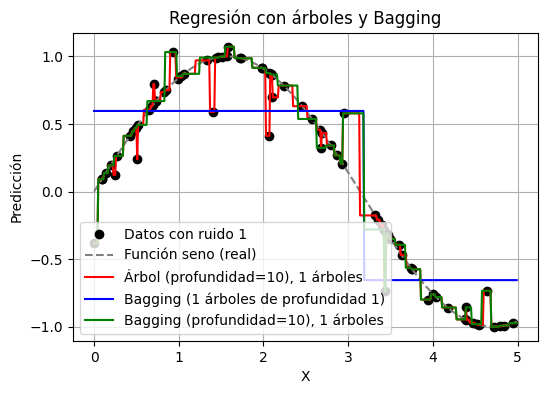

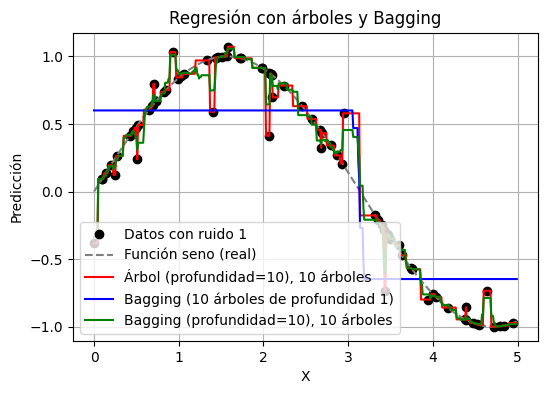

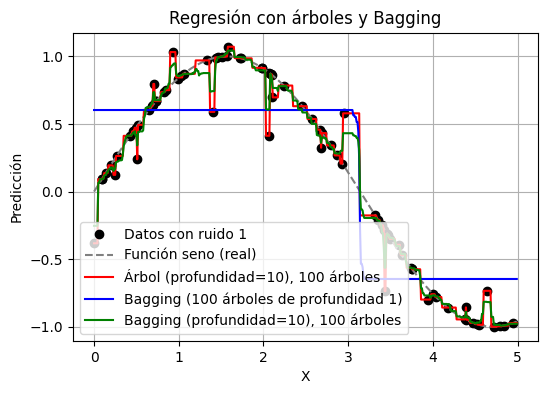

In [162]:
# Experimento variar numero de estimadores L

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
noise_level = 1
y[::5] += (0.5 - rng.rand(16)) * noise_level
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

estimators = [1,10,100]
for estimator in estimators:
    y_tree, y_bagging_stumps, y_bagging_trees = training_function(X, y, n_estimators=estimator)
    plotGen(X=X, y=y, X_test=X_test, y_tree= y_tree, y_bagging_stumps=y_bagging_stumps, y_bagging_trees=y_bagging_trees, n_estimators=estimator)

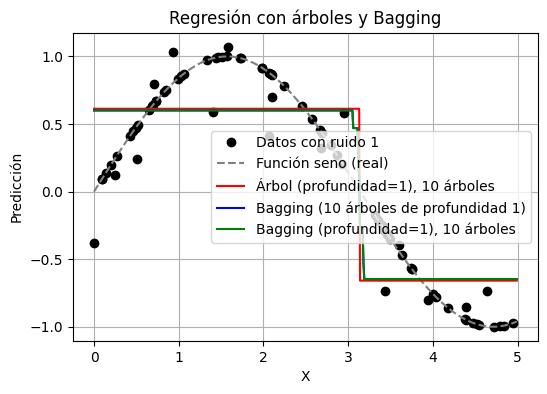

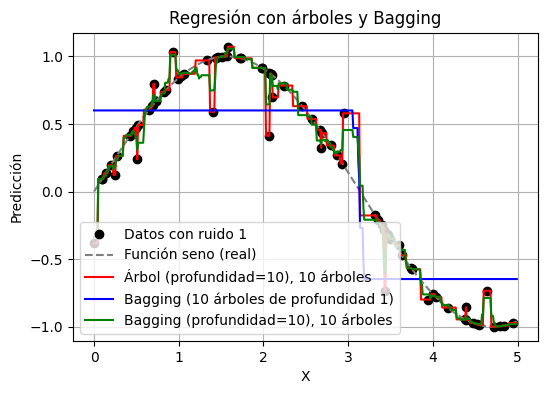

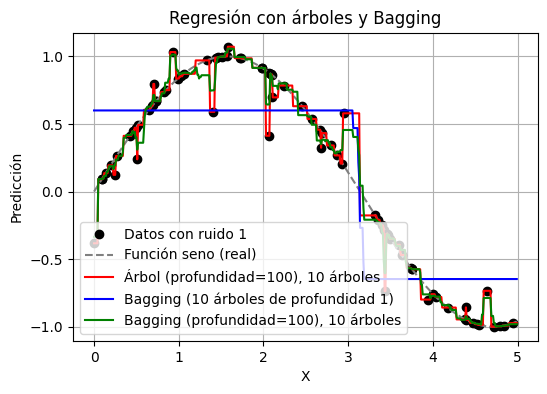

In [168]:
# Experimento variar max_depth

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
noise_level = 1
y[::5] += (0.5 - rng.rand(16)) * noise_level
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

max_depths = [1, 10, 100]
for max_depth in max_depths:
    y_tree, y_bagging_stumps, y_bagging_trees = training_function(X, y, tree_max_depth=max_depth, bagging_max_depth=max_depth)
    plotGen(X=X, y=y, X_test=X_test, y_tree= y_tree, y_bagging_stumps=y_bagging_stumps, y_bagging_trees=y_bagging_trees, tree_max_depth=max_depth, bagging_max_depth=max_depth)

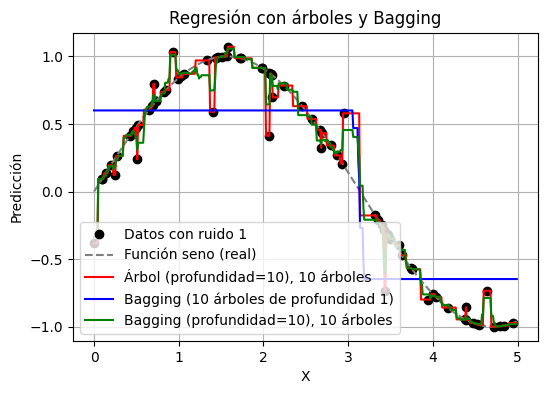

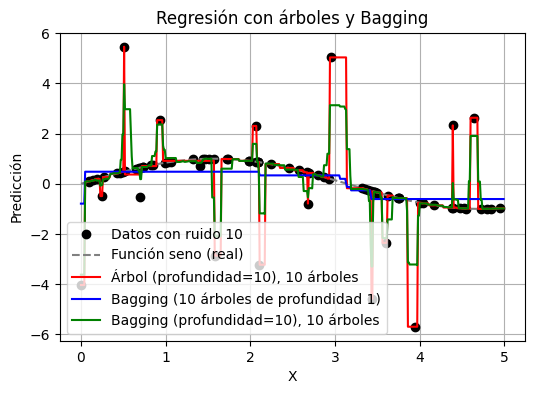

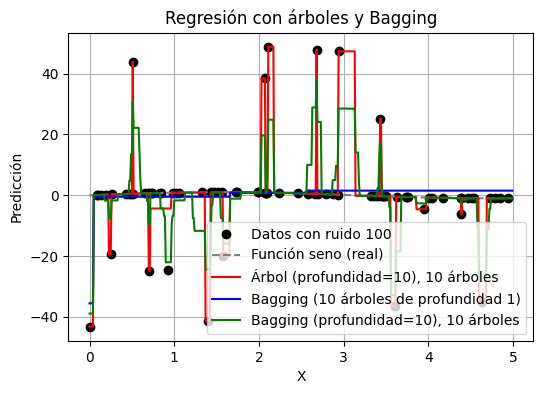

In [169]:
# Experimento variar nivel de ruido

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_base = np.sin(X).ravel()
multiple_y = []

noise_levels = [1,10,100]

for noise in noise_levels:
    y_noisy = y_base.copy()
    y_noisy[::5] += (0.5 - rng.rand(16)) * noise
    multiple_y.append(y_noisy)
    y_tree, y_bagging_stumps, y_bagging_trees = training_function(X=X, y=y_noisy)
    plotGen(X=X, y=y_noisy, X_test=X_test, y_tree= y_tree, y_bagging_stumps=y_bagging_stumps, y_bagging_trees=y_bagging_trees, noise_level=noise)

* Observe el efecto de $L$ y la profundidad del árbol (`max_depth`).
* ¿Cómo puede determinar que los estimadores basados en árboles están sesgados y que el bagging reduce su varianza?
* Experimentando con el nivel de ruido, resalte el overfitting. ¿Cómo se ve en el gráfico?

 Respuesta: 
 > **En el experimento de incremento de L, se notó que el gráfico se vuelve tosco, y con respecto a la profundidad del árbol no se nota una mejora sustancial a partir de 10.**

 > **Para determinar el sesgo podemos notar el caso de arboles con stumps donde no se logra capturar la forma de la función objetivo, a diferencia de las demás dónde si se ajusta de forma aceptable. Con respecto la varianza notamos como el bagging reduce su varianza en funcion de la profundidad del arbol.** 

 > **Con respecto al nivel de ruido, notamos que efectivamente el overfitting incrementa con picos abruptos en mayor medida para el arbol corriente mientras que en bagging este se ve suavizado, mientras que con stumps no vemos afectación por overfitting**

### Clasificador

Ahora, probemos con clasificadores.

8. Observa la decisión de frontera entre un árbol de decisión y un random forest. ¿Qué se puede decir sobre la generalización de la predicción del DT único y del conjunto? Usa la clase `BaggingClassifier`.

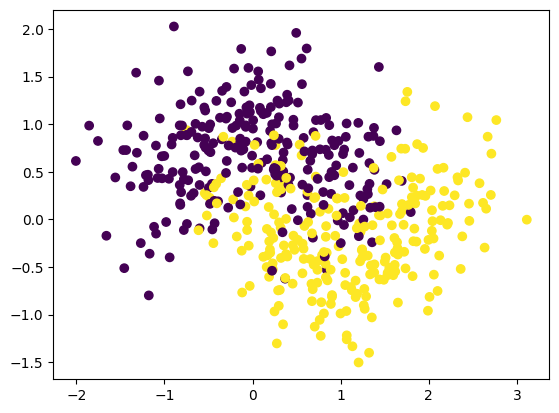

In [165]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [166]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Entrenar el clasificador con Bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
# ...

# TODO: Entrenar el clasificador con arbol de decision
# ...

# TODO: graficar las fronteras de los clasificadores sobre los datos
# ...

>**Respuesta:**

9. Compare los scores de 5-fold cross-validation de random forest y arboles de decisión (utilizando `DecisionTreeClassifier`). Varíe el parámetro `max_depth` de 1 a 30. Note cómo random forest ayuda a reducir el overfitting incluso con árboles profundos.

In [167]:
from sklearn.ensemble import RandomForestClassifier

# TODO: Entrenar los modelos con cross-validation variando max_depth
#       y guardar la precision promedio
# Puede ser útil el método set_params de los clasificadores

# ...

# TODO: Graficar los resultados
# ...